In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [29]:
df.drop(columns=['Unnamed: 0','year','month'],inplace=True)

In [30]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [31]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

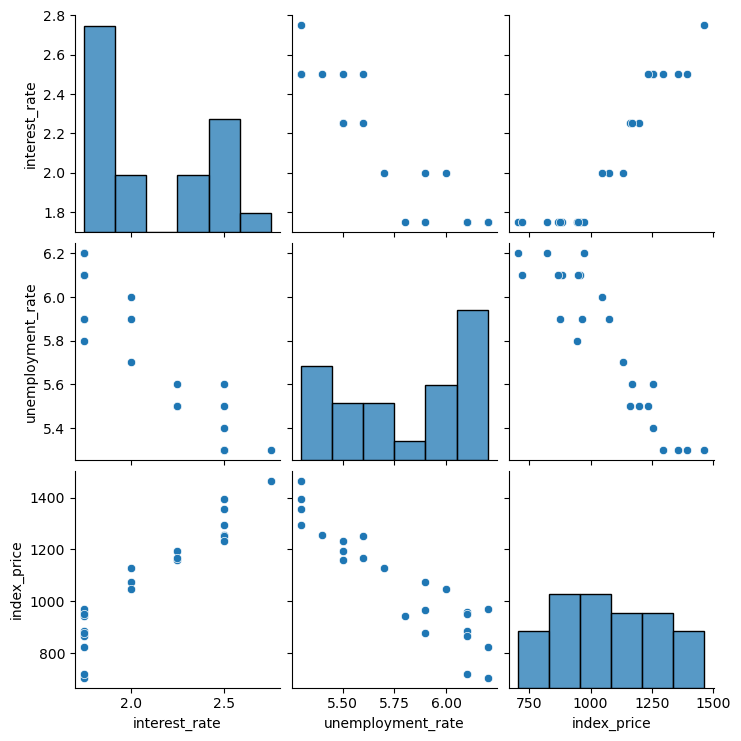

In [32]:
sns.pairplot(df)

In [33]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

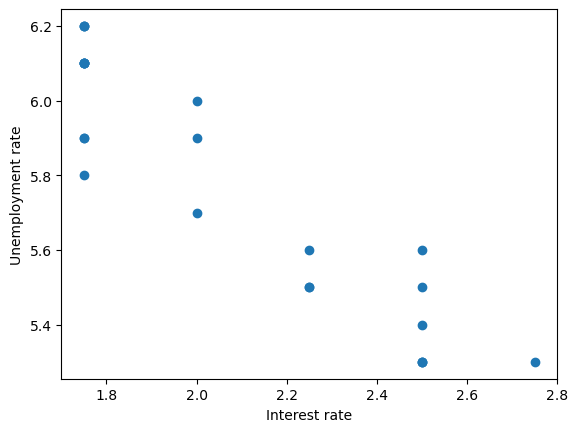

In [34]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")


In [35]:
#Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [37]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


<Axes: xlabel='interest_rate', ylabel='index_price'>

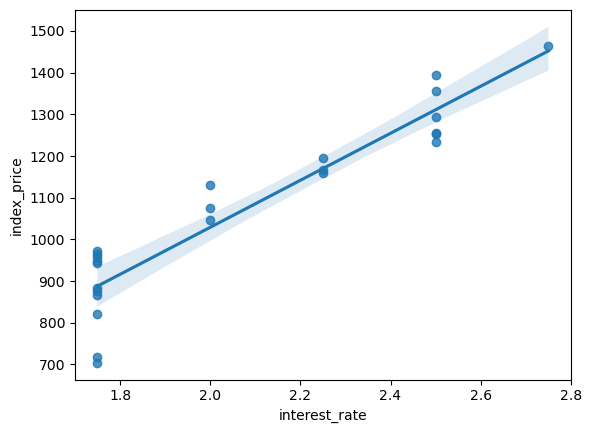

In [40]:
sns.regplot(x = 'interest_rate',y = 'index_price',data=df)

In [41]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

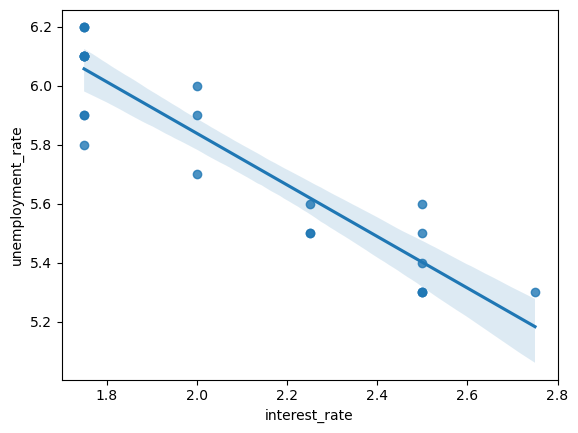

In [42]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

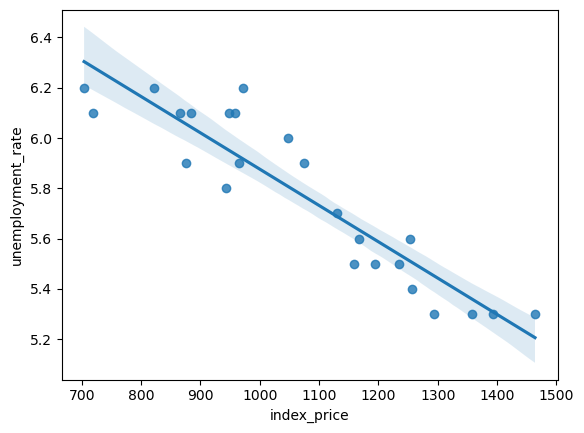

In [43]:
sns.regplot(x = 'index_price', y = 'unemployment_rate',data=df)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [45]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
X_train,X_test

(array([[ 0.55339859, -0.53244666],
        [-0.9486833 ,  0.41597395],
        [ 1.30443953, -1.48086727],
        [-0.9486833 ,  1.36439457],
        [ 1.30443953, -0.53244666],
        [ 1.30443953, -1.48086727],
        [-0.19764235,  0.73211416],
        [-0.9486833 ,  1.04825436],
        [ 1.30443953, -1.48086727],
        [ 1.30443953, -1.16472707],
        [-0.9486833 ,  1.36439457],
        [-0.9486833 ,  1.04825436],
        [-0.9486833 ,  0.41597395],
        [-0.9486833 ,  1.04825436],
        [ 0.55339859, -0.84858687],
        [-0.19764235, -0.21630646],
        [-0.9486833 ,  0.09983375],
        [-0.9486833 ,  1.04825436],
        [ 1.30443953, -0.84858687]]),
 array([[ 0.55339859, -0.84858687],
        [-0.9486833 ,  1.36439457],
        [ 2.05548048, -1.48086727],
        [-0.9486833 ,  1.04825436],
        [-0.19764235,  0.41597395]]))

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [50]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [51]:
validation_score

array([-4304.75412833, -7608.56499271, -5108.77588052])

In [52]:
np.mean(validation_score)

-5674.031667186765

In [53]:
regressor.fit(X_train,y_train)

LinearRegression()

Correct order

Split train/test

Run cross validation on X_train, y_train

Choose the best model

Fit the final model using all training data

Test on X_test, y_test

🟥 Wrong order

Fit model first

Then cross validate

❌ Not correct because CV needs raw model (unfitted model).

In [54]:
y_pred = regressor.predict(X_test)
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258827
71.71878409976621
83.4092638935198


In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8254940547158577
0.6509881094317154


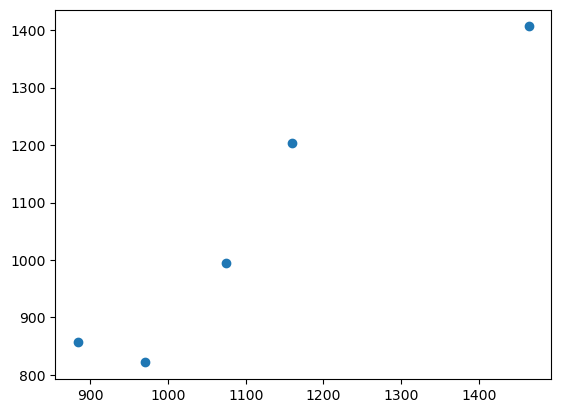

In [57]:
plt.scatter(y_test,y_pred)

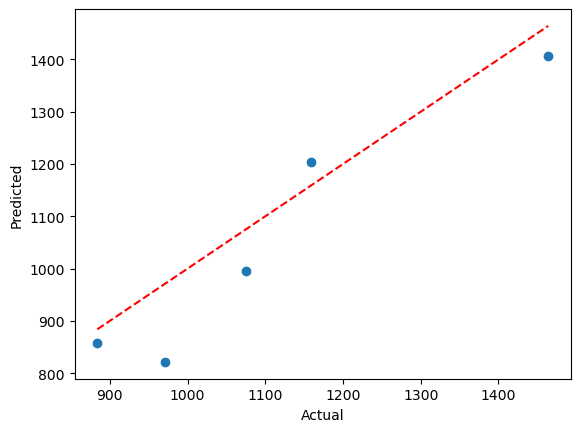

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


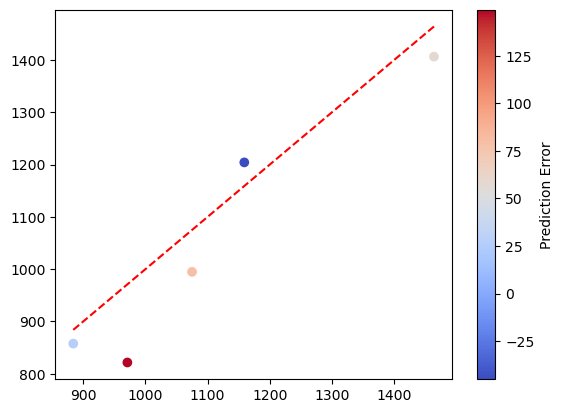

In [65]:
errors = y_test - y_pred
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm')
plt.colorbar(label='Prediction Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [58]:
residuals=y_test-y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


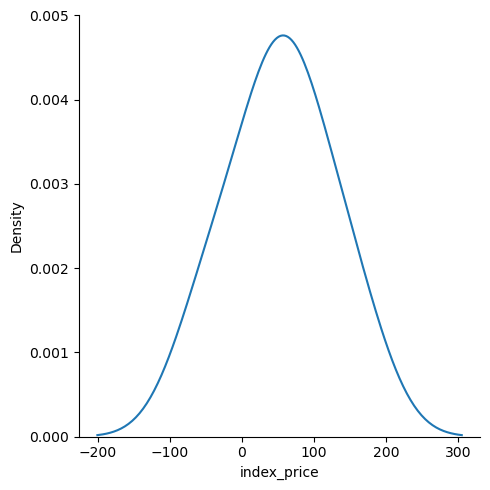

In [59]:
## Plot this residuals
sns.displot(residuals,kind='kde')

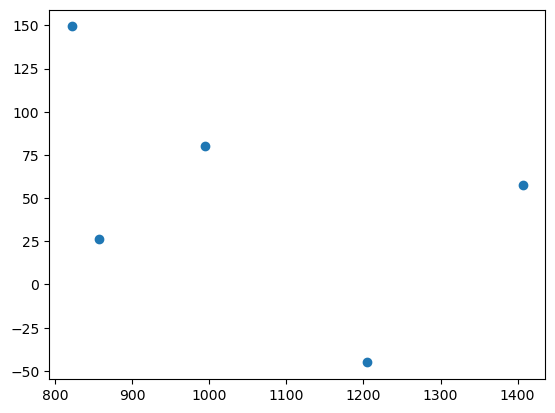

In [60]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [62]:
print(regressor.coef_)

[  86.63351334 -114.04857249]


In [63]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [64]:
model.summary()

c:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Wed, 19 Nov 2025   Prob (F-statistic):                       0.751
Time:                        14:32:10   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""